In [33]:
import torch
import matplotlib.pyplot as plt
from torch import nn,optim
from time import perf_counter

In [34]:
x = torch.unsqueeze(torch.linspace(-3,3,100000),dim = 1)    #产生100000个点，并用unsqueeze()函数在第一维处增加一维
y = x+1.2*torch.rand(x.size())
x.size()

torch.Size([100000, 1])

In [35]:
class LR(nn.Module):
    def __init__(self):
        super(LR,self).__init__()   #执行父类的初始化
        self.linear = nn.Linear(1,1)   #使用nn.Linear(1,1)模块构造线性模型，第一个参数是输入数据的维度，第二个是输出维度
    def forward(self,x):   #定义此方法来构造前向传播步骤
        out = self.linear(x)
        return out

In [36]:
#CUDA
LR_modle = LR().cuda()  #初始化LR类的实例时调用cuda()
inputs = x.cuda()
target = y.cuda()

In [37]:
criterion = nn.MSELoss()   #均方误差函数作为损失函数

In [38]:
optimizer = optim.SGD(LR_modle.parameters(),lr = 1e-4)   #SGD随机梯度下降，用来更新权重，第一个参数是需要优化的神经网络的参数，第二个是学习率

In [39]:
def train(modle,criterion,optimizer,epochs):
    for epochs in range(epochs):
        output = modle(inputs)    #modle为参数传入的线性神经元模型LR_modle
        loss = criterion(output,target)   #损失函数
        optimizer.zero_grad()    #清空权重的grad
        loss.backward()     #反向传播计算梯度
        optimizer.step()    #更新权重
        if epochs % 80 ==0:
            draw(output,loss)
    return modle,loss

In [40]:
def draw(output,loss):
    output = output.cpu()   #如果使用了CUDA，画图时需要把GPU数据转移到CPU
    plt.cla()
    plt.scatter(x.numpy(),y.numpy())
    plt.plot(x.numpy(),output.data.numpy(),'r-',lw=5)
    plt.text(0.5,0,'loss=%s'% (loss.item()),fontdict={'size':20,'color':'red'})
    plt.pause(0.005)

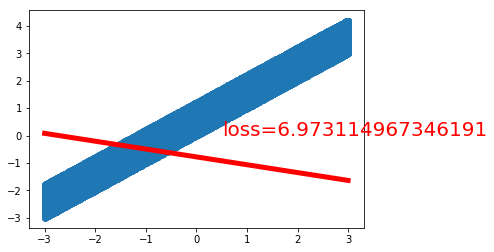

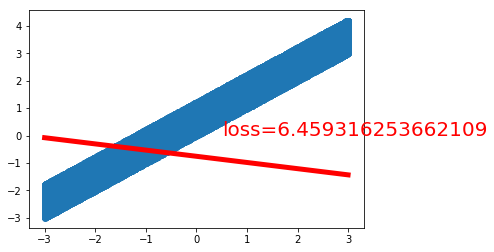

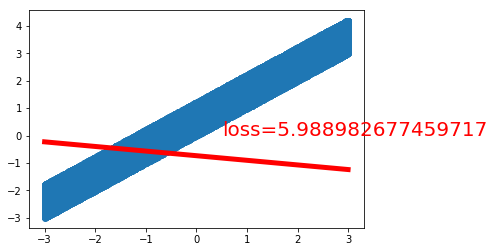

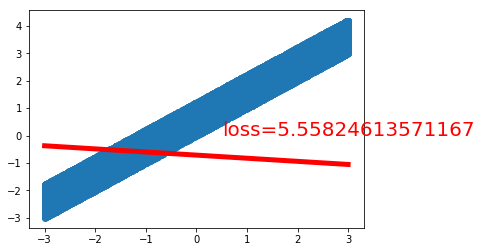

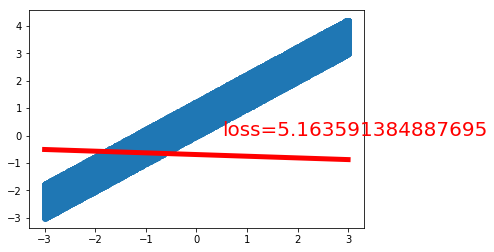

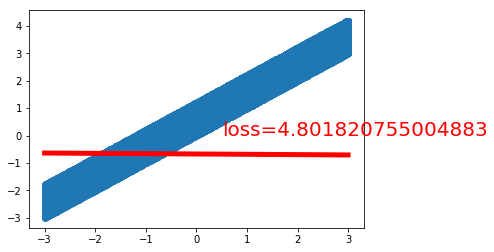

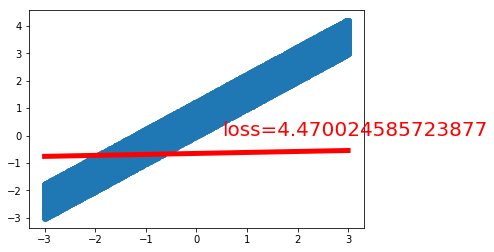

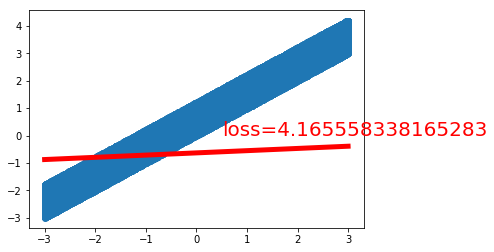

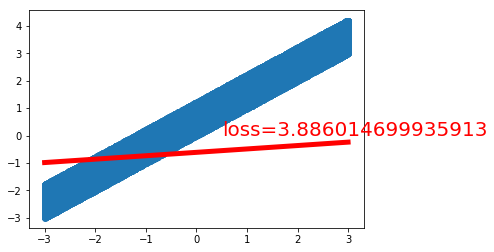

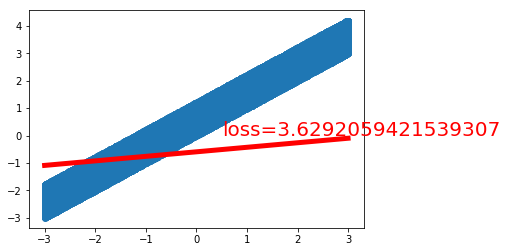

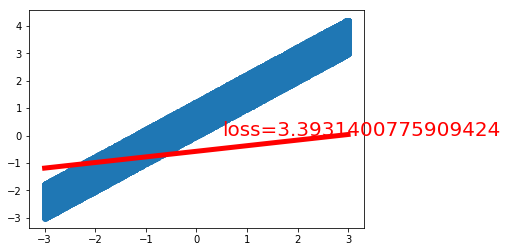

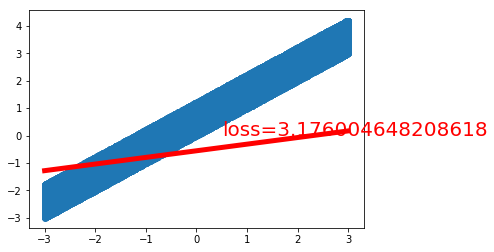

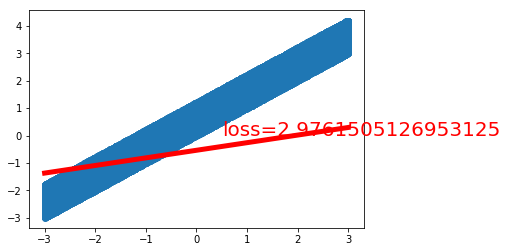

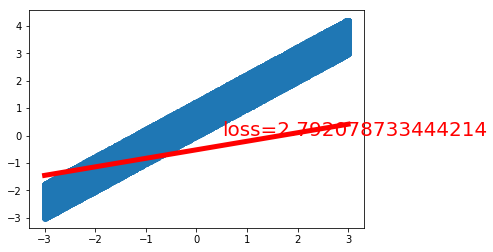

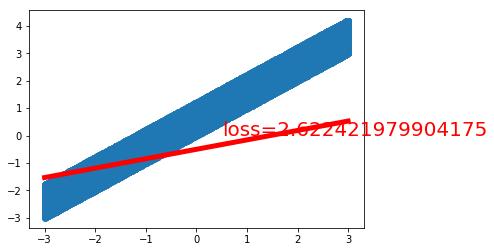

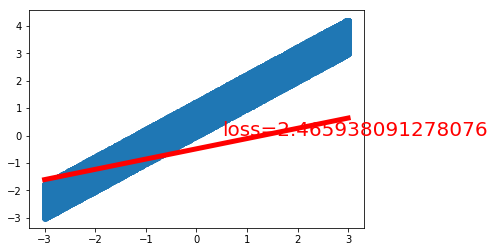

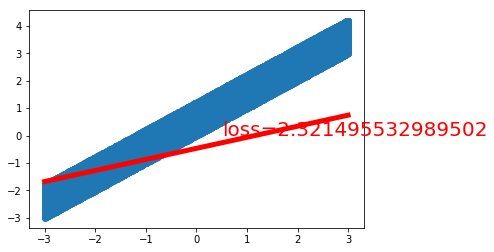

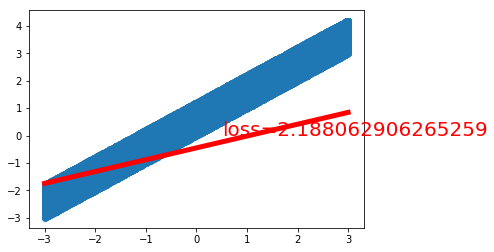

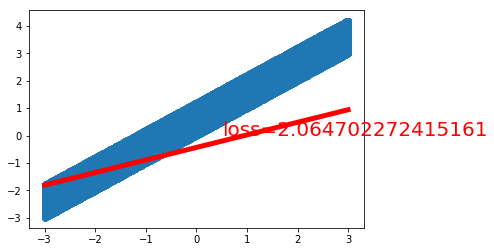

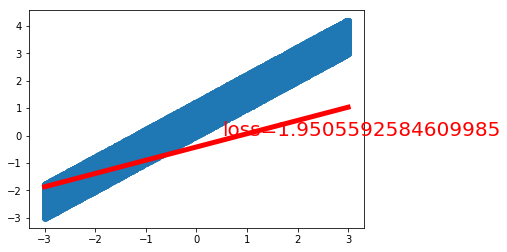

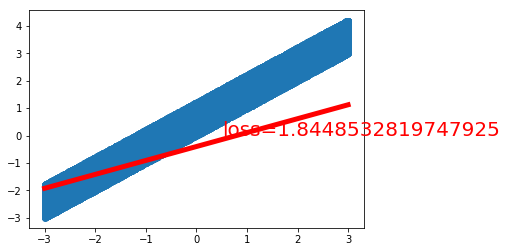

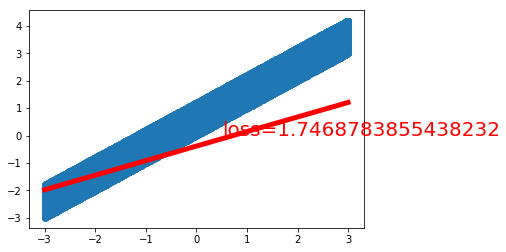

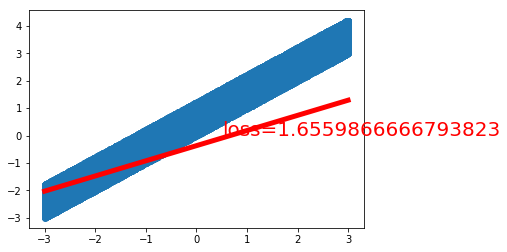

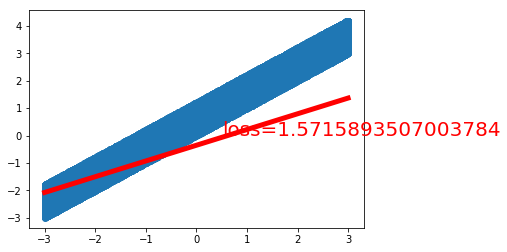

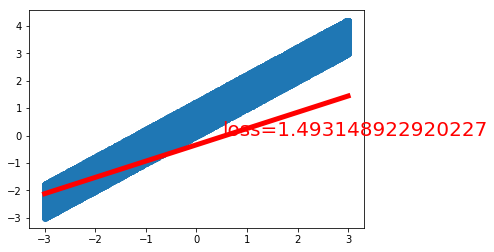

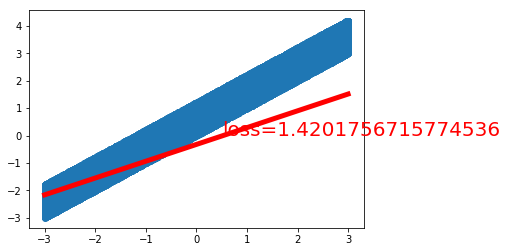

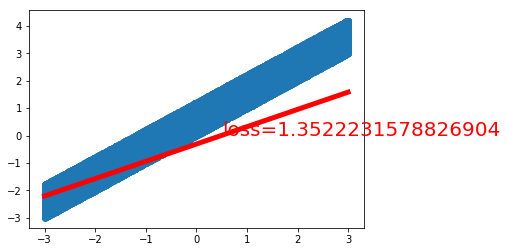

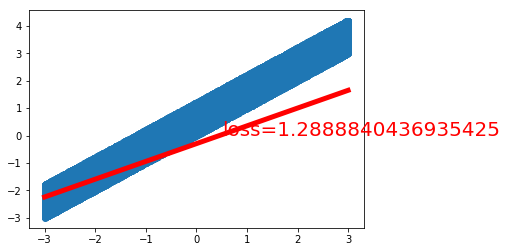

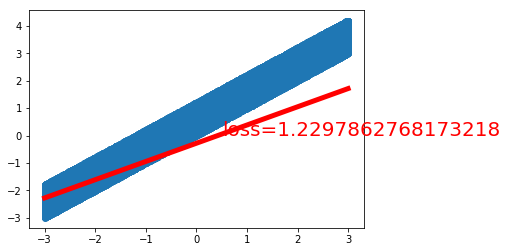

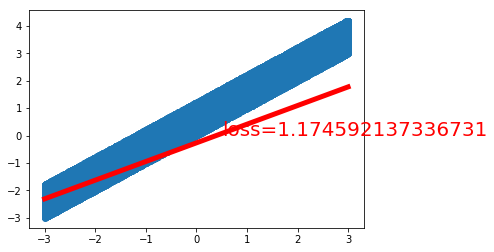

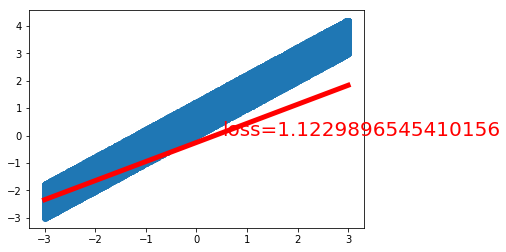

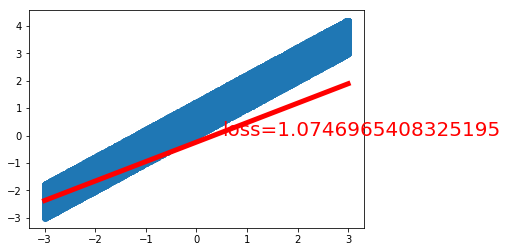

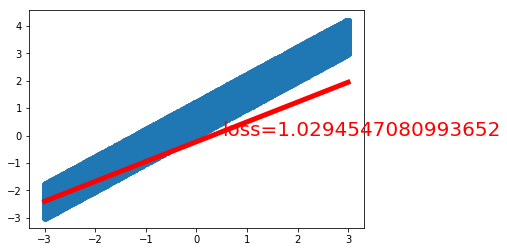

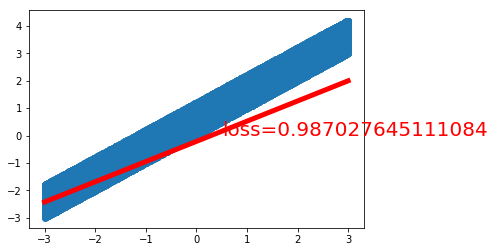

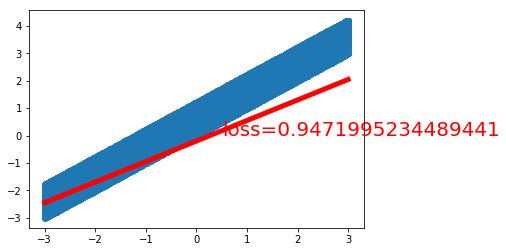

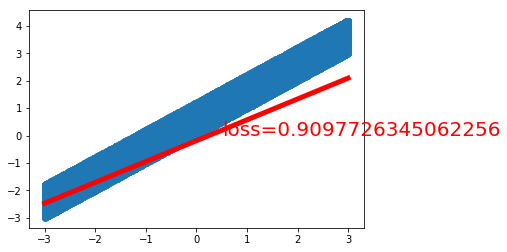

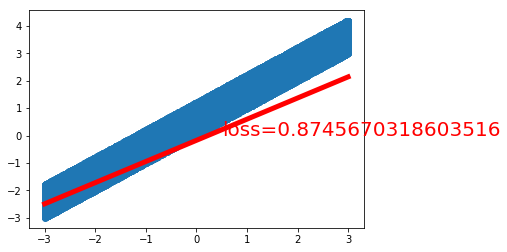

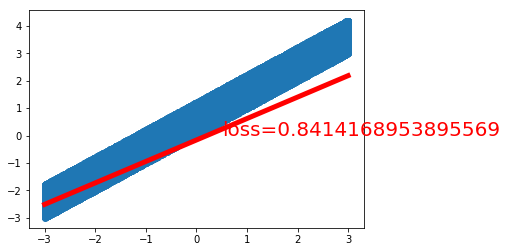

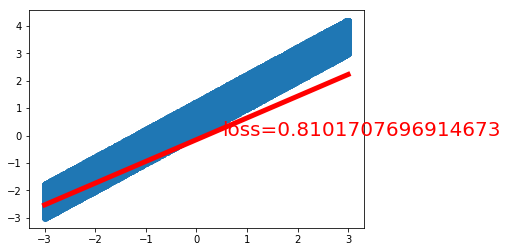

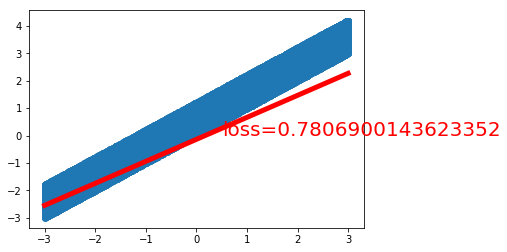

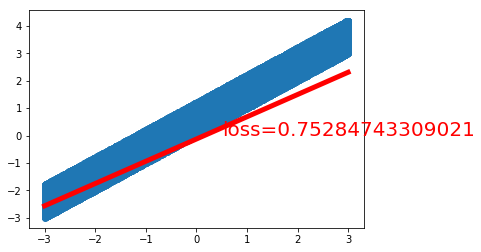

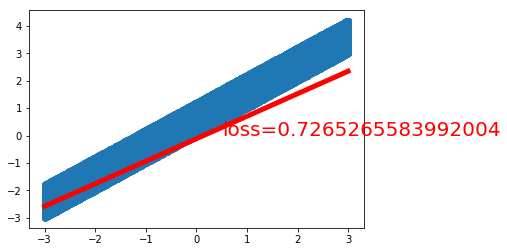

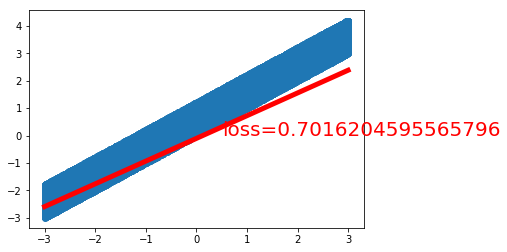

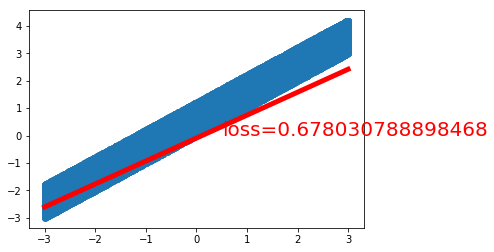

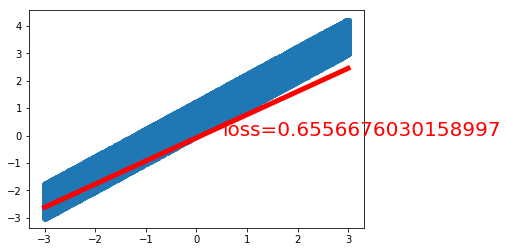

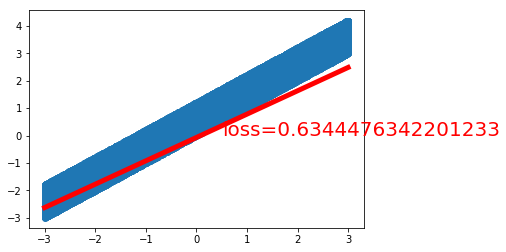

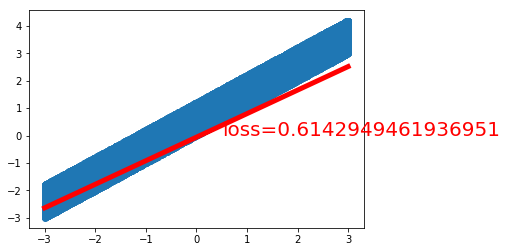

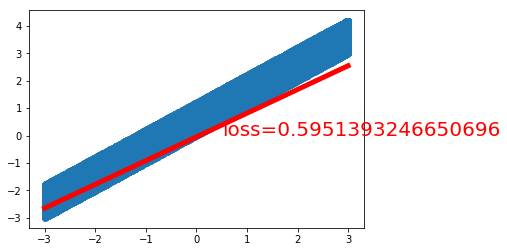

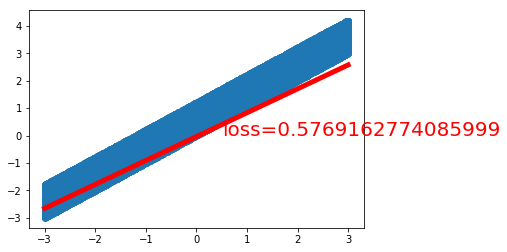

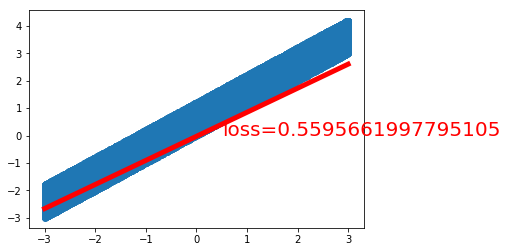

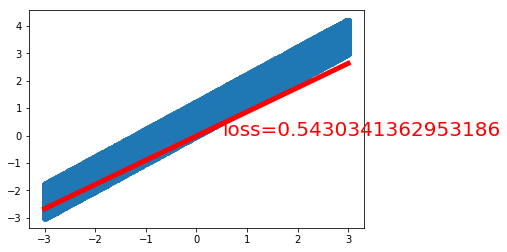

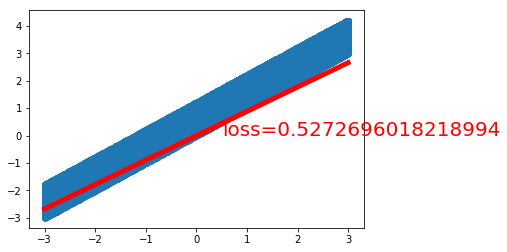

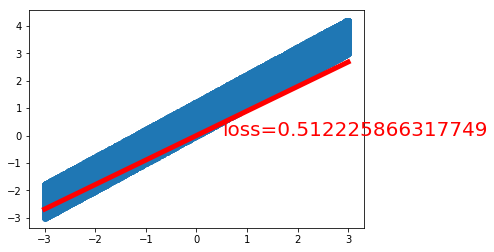

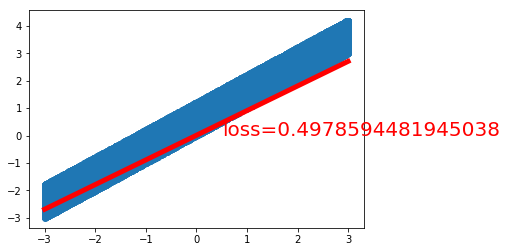

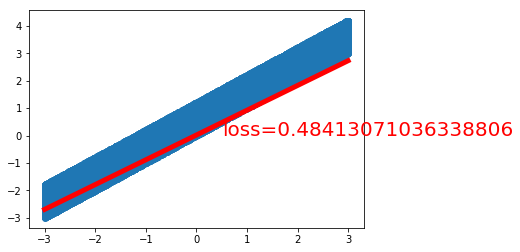

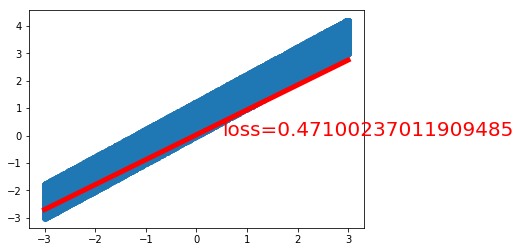

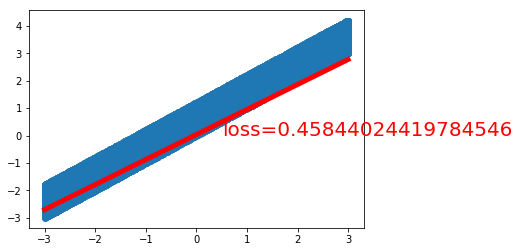

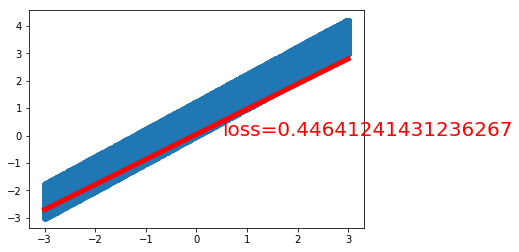

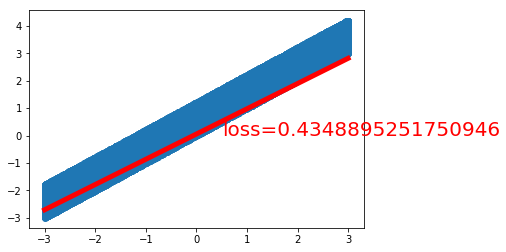

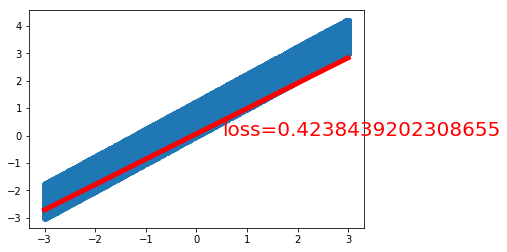

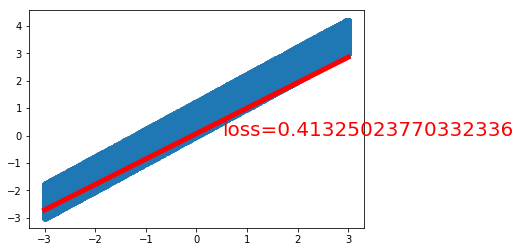

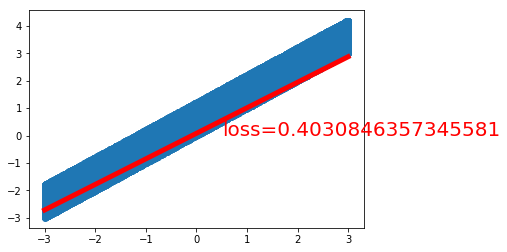

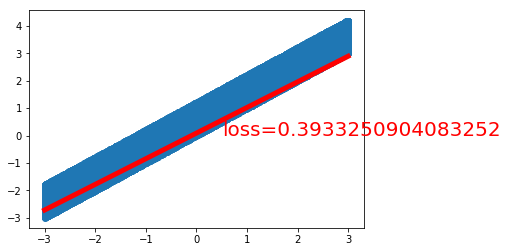

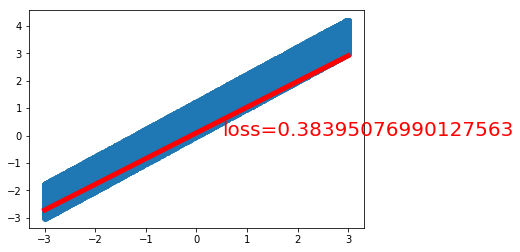

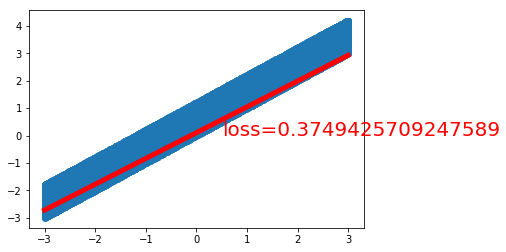

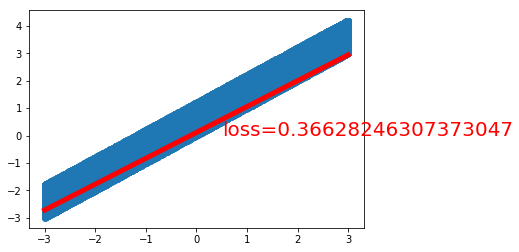

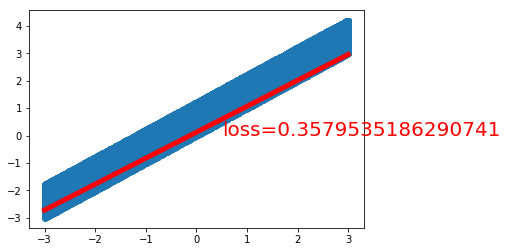

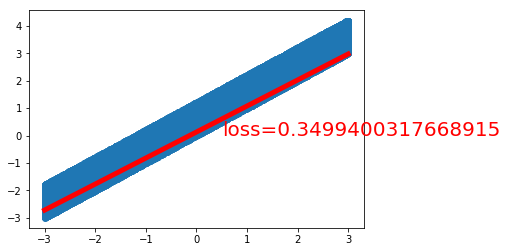

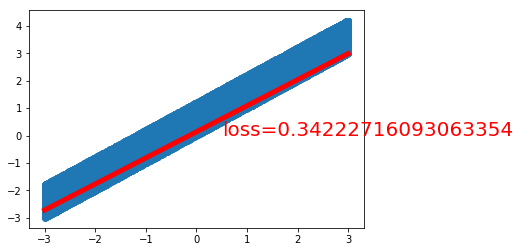

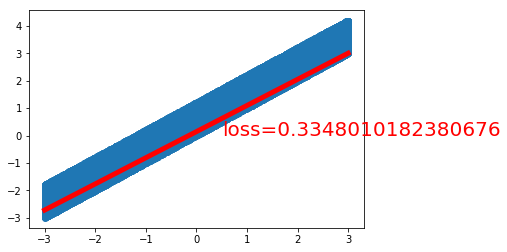

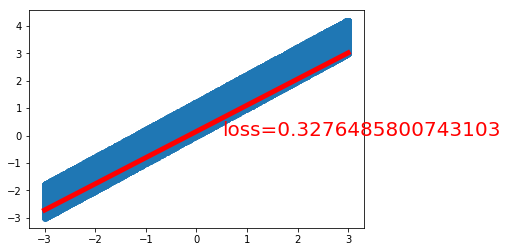

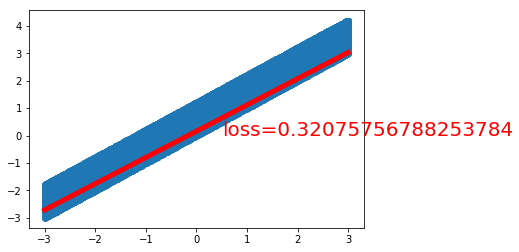

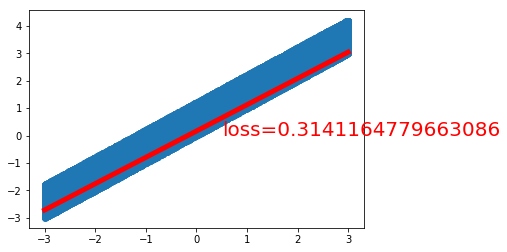

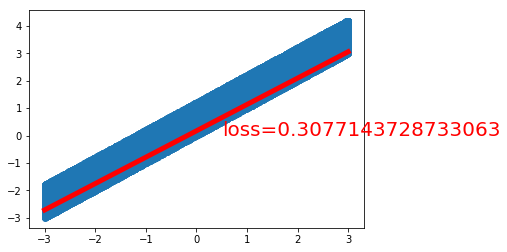

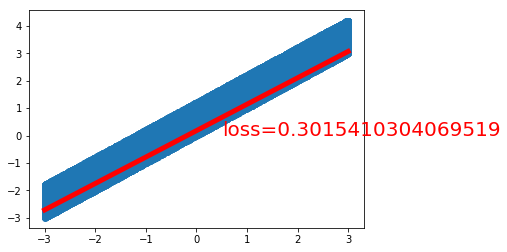

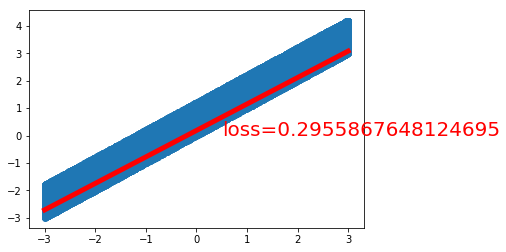

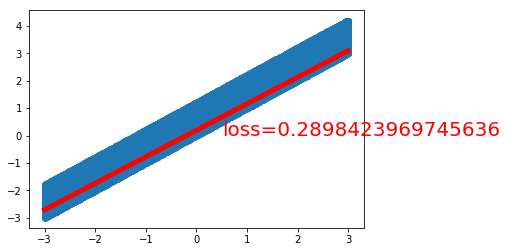

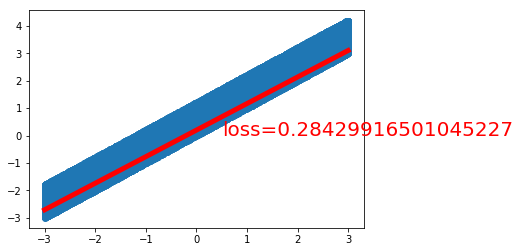

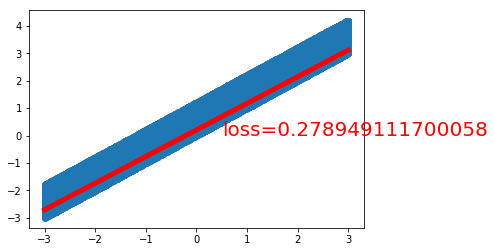

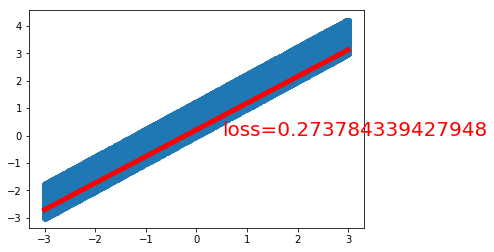

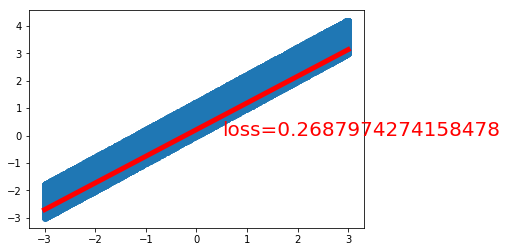

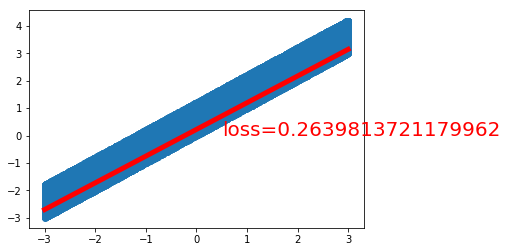

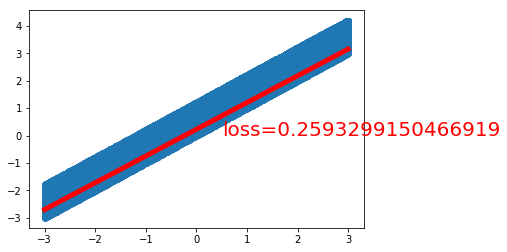

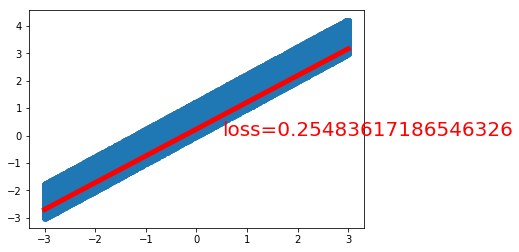

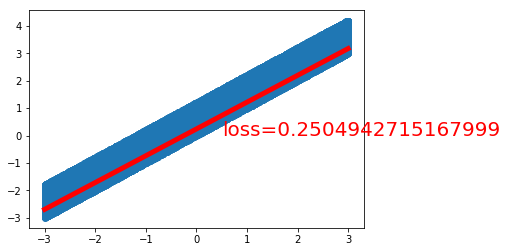

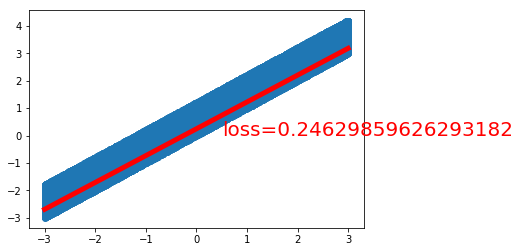

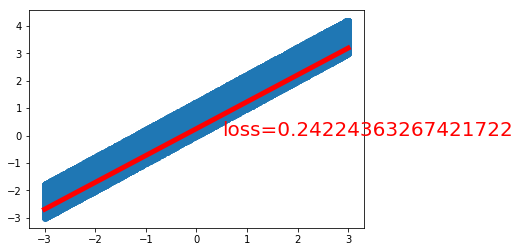

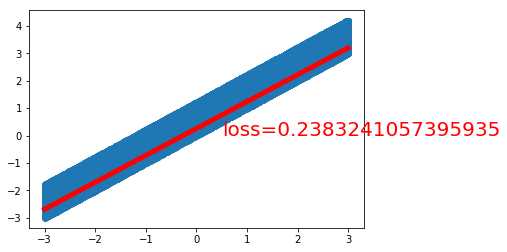

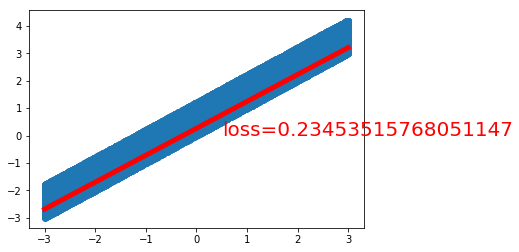

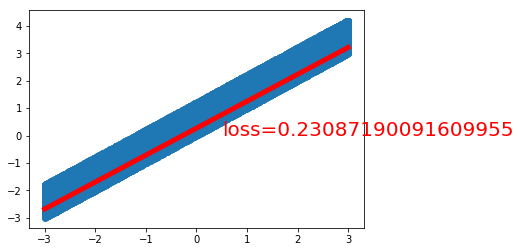

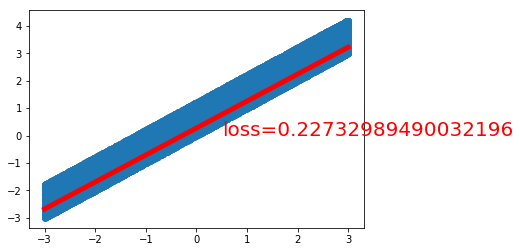

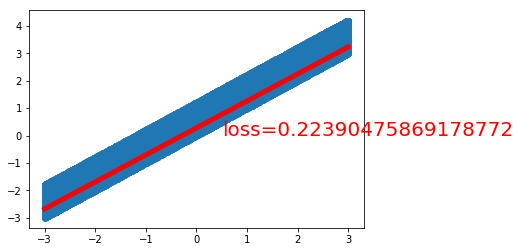

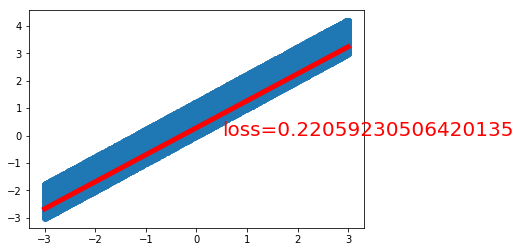

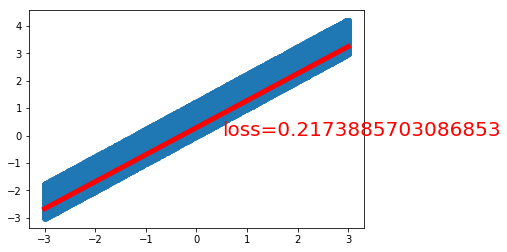

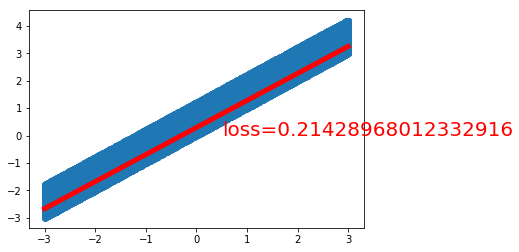

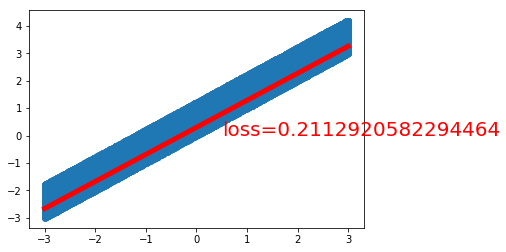

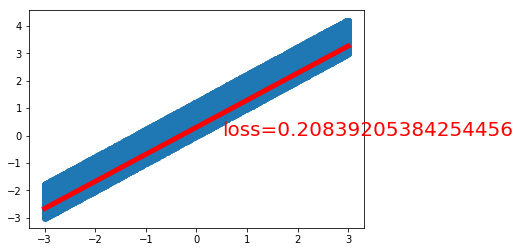

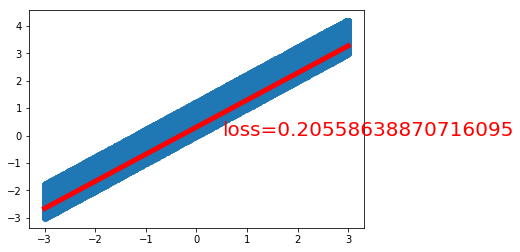

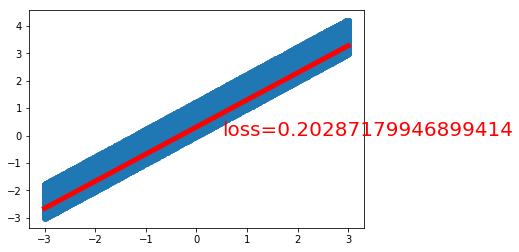

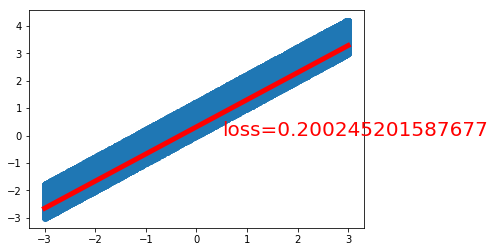

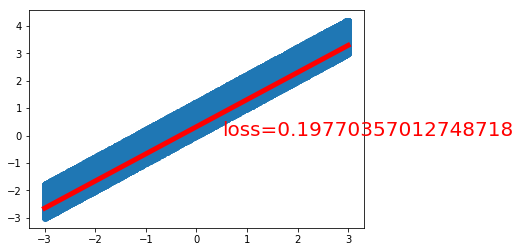

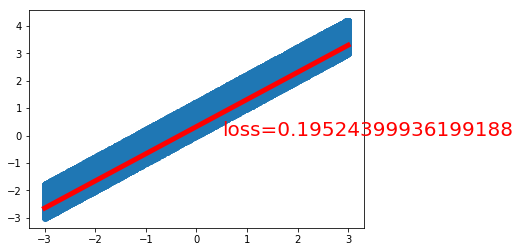

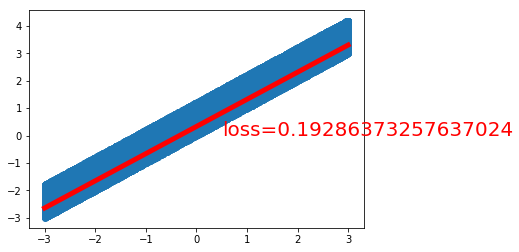

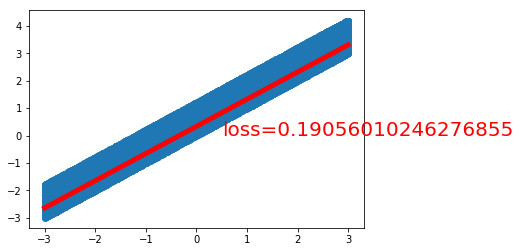

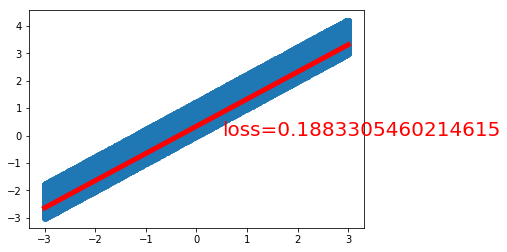

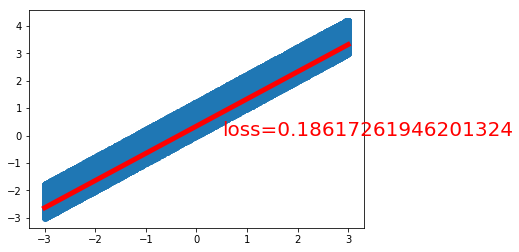

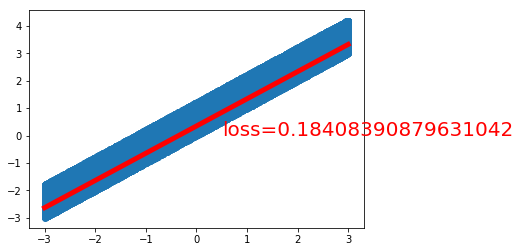

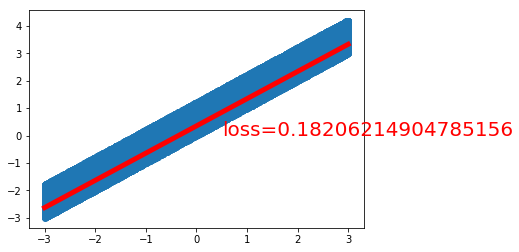

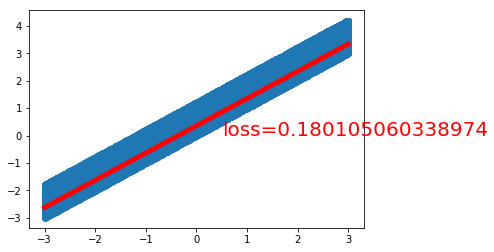

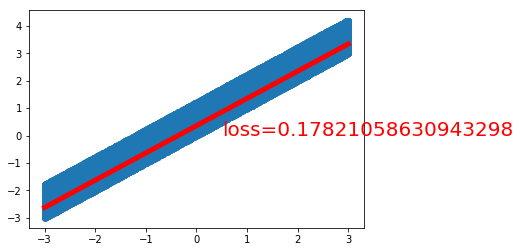

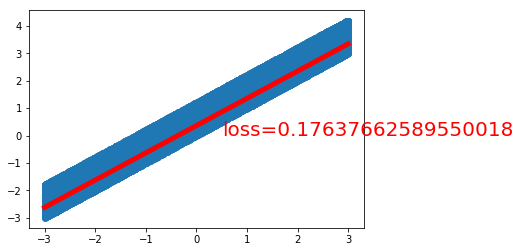

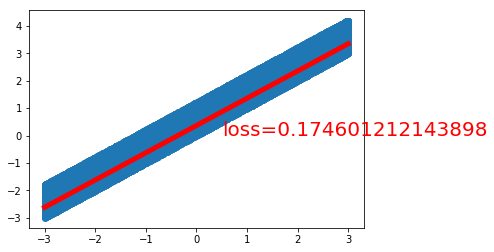

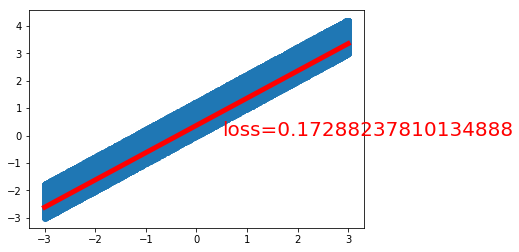

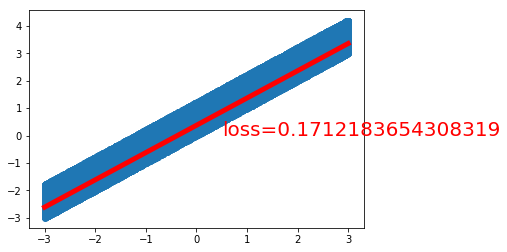

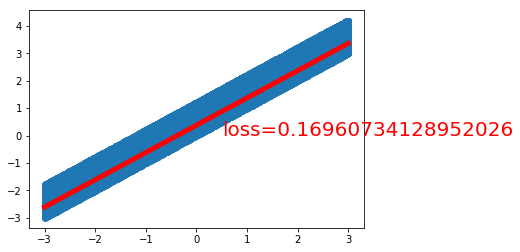

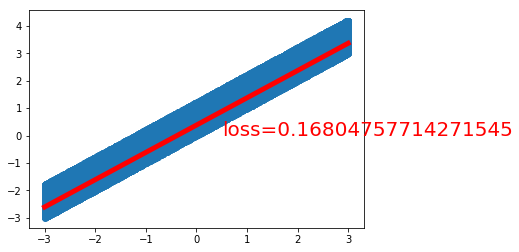

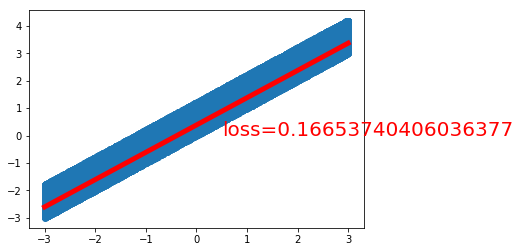

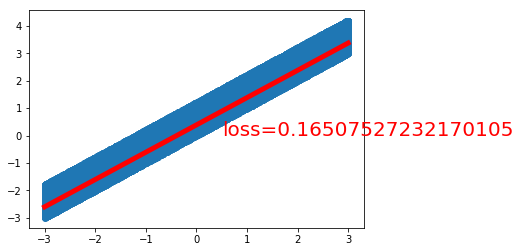

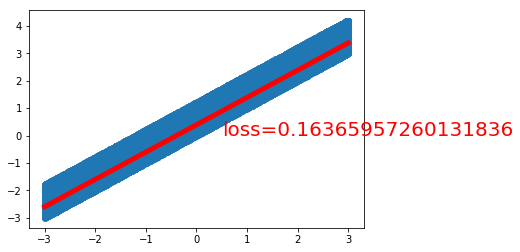

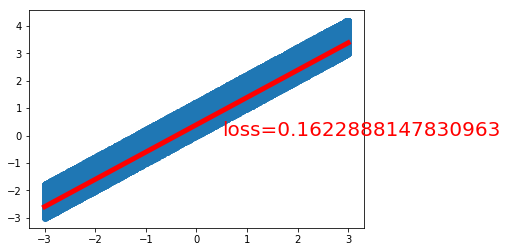

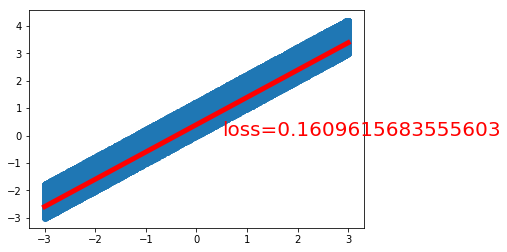

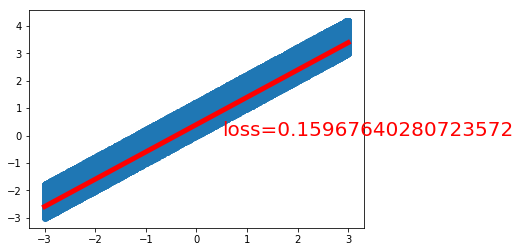

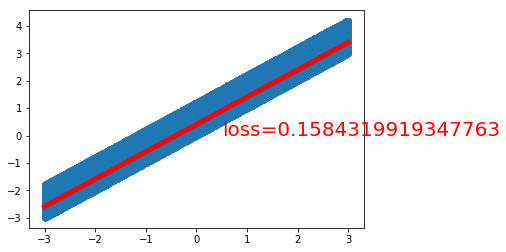

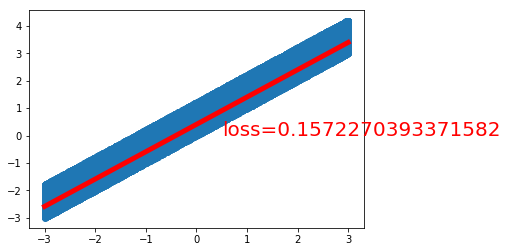

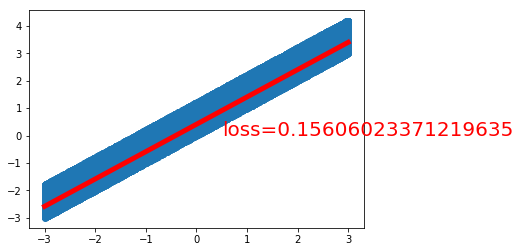

计算时间：100.4361897
final loss: 0.15494433045387268
weights: [Parameter containing:
tensor([[0.9966]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0.4124], device='cuda:0', requires_grad=True)]


In [41]:
start = perf_counter()
LR_modle,loss = train(LR_modle,criterion,optimizer,10000)
finish = perf_counter()
time = finish - start
print("计算时间：%s"%time)
print("final loss:",loss.item())
print("weights:",list(LR_modle.parameters()))